# Soccer Data Analysis and Visualization

This notebook analyzes soccer data from major leagues using the Football-Data.org API (free tier). We'll create various visualizations to understand team performance, goals, and match results.

## Features
- League standings analysis
- Team performance comparisons
- Goals analysis
- Win/Draw/Loss patterns

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Set plotting style
plt.style.use('default')  # Use default style first
sns.set_theme()  # Apply seaborn theme
sns.set_palette('husl')  # Set color palette

## Data Collection and Processing
Let's create a class to handle our data fetching and processing needs.

In [2]:
class SoccerAnalyzer:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = 'http://api.football-data.org/v4'
        self.headers = {
            'X-Auth-Token': api_key
        }
    
    def fetch_league_data(self, competition_code, season):
        """Fetch team standings for a specific league and season"""
        url = f"{self.base_url}/competitions/{competition_code}/standings"
        params = {
            'season': season
        }
        response = requests.get(url, headers=self.headers, params=params)
        return response.json()
    
    def extract_standings(self, data):
        """Convert API response to DataFrame"""
        standings = []
        for team in data['standings'][0]['table']:
            standings.append({
                'team': team['team']['name'],
                'points': team['points'],
                'goals_for': team['goalsFor'],
                'goals_against': team['goalsAgainst'],
                'won': team['won'],
                'lost': team['lost'],
                'drawn': team['draw'],
                'position': team['position'],
                'played': team['playedGames']
            })
        return pd.DataFrame(standings)

## Visualization Functions
Now let's create functions for different types of visualizations.

In [3]:
def plot_points_distribution(df):
    """Plot points distribution across teams"""
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df.sort_values('position'),
               x='team', y='points')
    plt.xticks(rotation=45, ha='right')
    plt.title('League Points Distribution')
    plt.tight_layout()
    plt.show()

def plot_goals_analysis(df):
    """Plot goals for vs against by team"""
    plt.figure(figsize=(12, 6))
    x = np.arange(len(df))
    width = 0.35

    plt.bar(x - width/2, df['goals_for'], width, label='Goals For')
    plt.bar(x + width/2, df['goals_against'], width, label='Goals Against')

    plt.xlabel('Teams')
    plt.ylabel('Goals')
    plt.title('Goals For vs Goals Against by Team')
    plt.xticks(x, df['team'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_match_results(df):
    """Plot win-draw-loss distribution"""
    plt.figure(figsize=(12, 6))
    df[['won', 'drawn', 'lost']].plot(kind='bar', stacked=True)
    plt.title('Win-Draw-Loss Distribution by Team')
    plt.xlabel('Teams')
    plt.ylabel('Number of Matches')
    plt.xticks(range(len(df)), df['team'], rotation=45, ha='right')
    plt.legend(title='Result')
    plt.tight_layout()
    plt.show()

def plot_performance_scatter(df):
    """Plot win rate vs goal difference scatter plot"""
    df['goal_difference'] = df['goals_for'] - df['goals_against']
    df['win_rate'] = df['won'] / df['played']

    plt.figure(figsize=(10, 6))
    plt.scatter(df['win_rate'], df['goal_difference'])

    for i, team in enumerate(df['team']):
        plt.annotate(team, 
                    (df['win_rate'].iloc[i], df['goal_difference'].iloc[i]))

    plt.xlabel('Win Rate')
    plt.ylabel('Goal Difference')
    plt.title('Team Performance: Win Rate vs Goal Difference')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Data Analysis
Let's fetch and analyze Premier League data. First, get your free API key from [Football-Data.org](http://api.football-data.org/register)

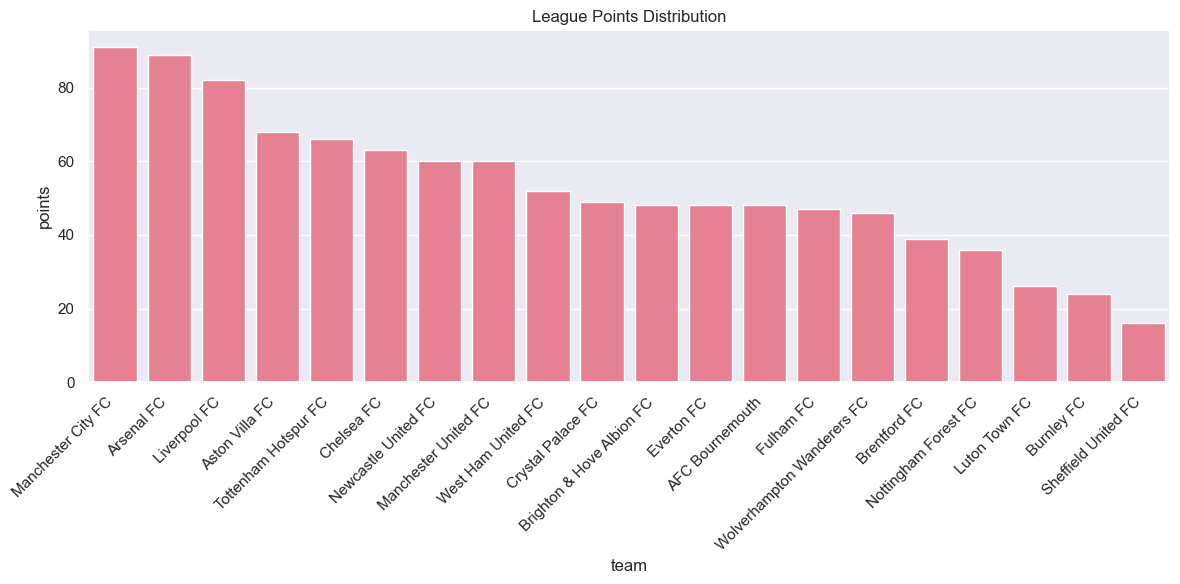

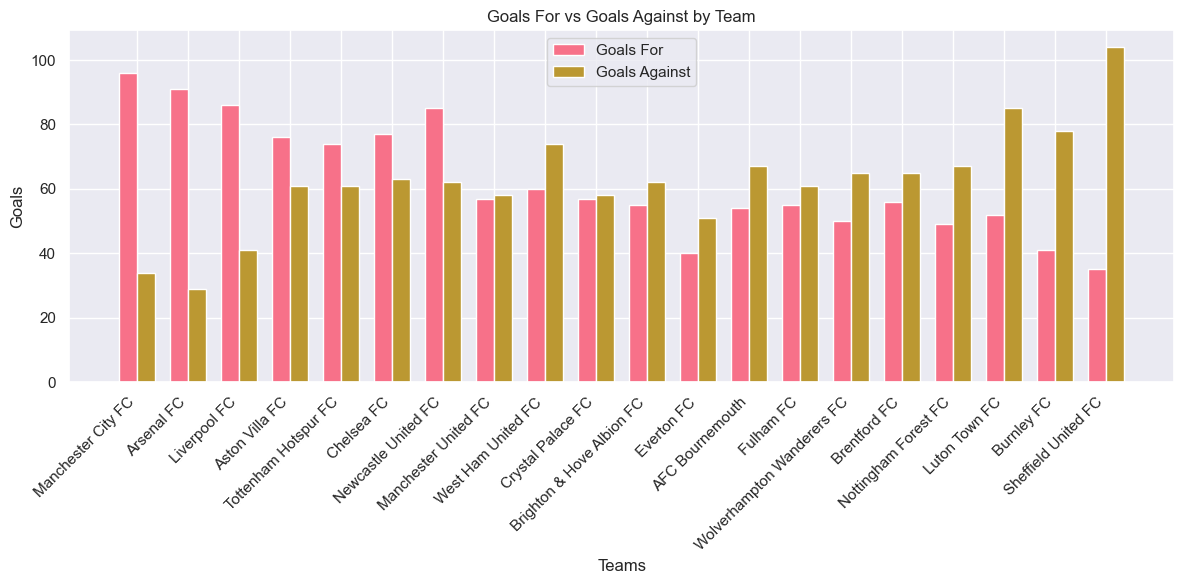

<Figure size 1200x600 with 0 Axes>

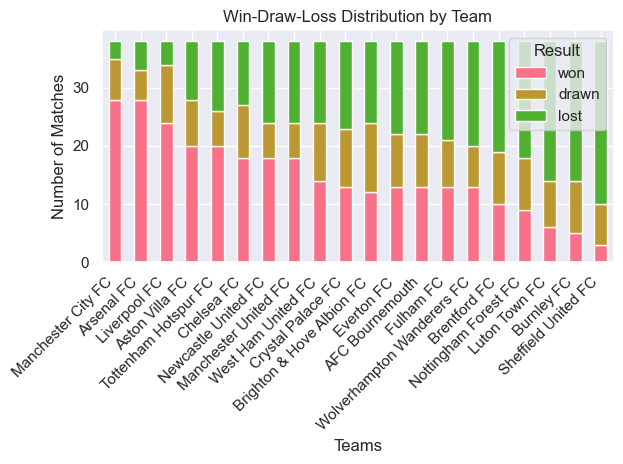

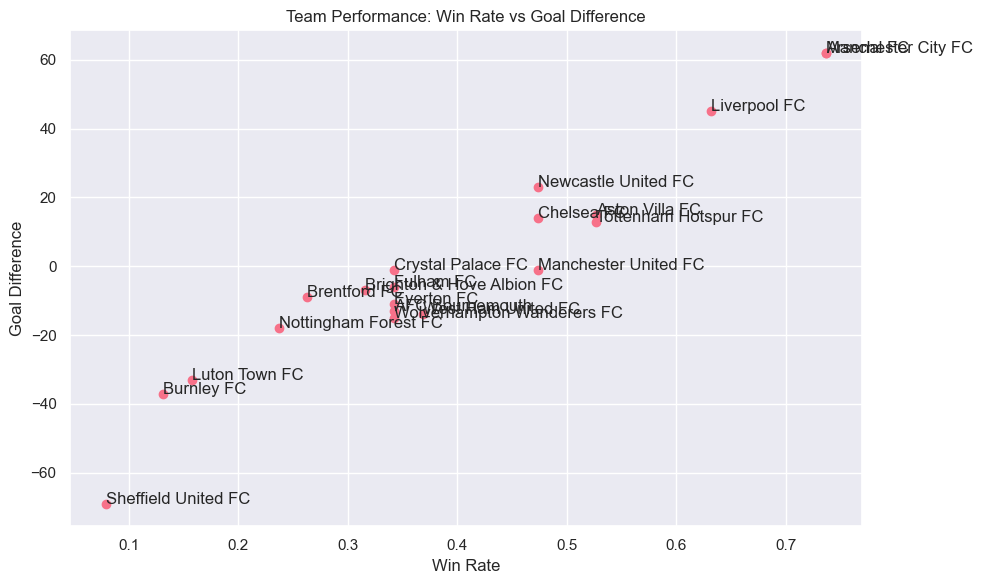

,Value
Total Goals,1246
Average Goals per Team,62.3
Highest Scoring Team,Manchester City FC
Best Defense,Arsenal FC
Most Wins,Manchester City FC
Average Points,52.9


In [4]:
# Initialize the analyzer with your API key
api_key = '17b6039d4bb047ae87e05c07e36aaaab'  # Replace with your actual API key
analyzer = SoccerAnalyzer(api_key)

# Fetch Premier League data
premier_league_data = analyzer.fetch_league_data('PL', 2023)
standings_df = analyzer.extract_standings(premier_league_data)

# Generate visualizations
plot_points_distribution(standings_df)
plot_goals_analysis(standings_df)
plot_match_results(standings_df)
plot_performance_scatter(standings_df)

# Display some statistics
stats = pd.DataFrame({
    'Total Goals': standings_df['goals_for'].sum(),
    'Average Goals per Team': standings_df['goals_for'].mean(),
    'Highest Scoring Team': standings_df.loc[standings_df['goals_for'].idxmax(), 'team'],
    'Best Defense': standings_df.loc[standings_df['goals_against'].idxmin(), 'team'],
    'Most Wins': standings_df.loc[standings_df['won'].idxmax(), 'team'],
    'Average Points': standings_df['points'].mean()
}, index=['Value'])

stats.T

## Player Statistics and Advanced Visualizations

Let's add functionality to analyze player statistics and create more insightful visualizations.

In [5]:
class PlayerAnalyzer:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = 'http://api.football-data.org/v4'
        self.headers = {
            'X-Auth-Token': api_key
        }
    
    def fetch_team_players(self, team_id):
        """Fetch players for a specific team"""
        url = f"{self.base_url}/teams/{team_id}/squad"
        response = requests.get(url, headers=self.headers)
        return response.json()
    
    def fetch_scorers(self, competition_code):
        """Fetch top scorers for a competition"""
        url = f"{self.base_url}/competitions/{competition_code}/scorers"
        response = requests.get(url, headers=self.headers)
        return response.json()
    
    def extract_players_data(self, data):
        """Convert player API response to DataFrame"""
        players = []
        for player in data['squad']:
            players.append({
                'name': player['name'],
                'position': player['position'],
                'nationality': player['nationality'],
                'dateOfBirth': player['dateOfBirth']
            })
        return pd.DataFrame(players)
    
    def extract_scorers_data(self, data):
        """Convert scorers API response to DataFrame"""
        scorers = []
        for scorer in data['scorers']:
            scorers.append({
                'player': scorer['player']['name'],
                'team': scorer['team']['name'],
                'goals': scorer['goals'],
                'assists': scorer.get('assists', 0),
                'penalties': scorer.get('penalties', 0)
            })
        return pd.DataFrame(scorers)

## Advanced Visualization Functions
Additional visualization functions for deeper analysis

In [6]:
def plot_position_distribution(df):
    """Plot distribution of player positions"""
    plt.figure(figsize=(10, 6))
    position_counts = df['position'].value_counts()
    sns.barplot(x=position_counts.index, y=position_counts.values)
    plt.title('Distribution of Player Positions')
    plt.xlabel('Position')
    plt.ylabel('Number of Players')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_nationality_distribution(df):
    """Plot top 10 nationalities"""
    plt.figure(figsize=(12, 6))
    nationality_counts = df['nationality'].value_counts().head(10)
    sns.barplot(x=nationality_counts.values, y=nationality_counts.index)
    plt.title('Top 10 Player Nationalities')
    plt.xlabel('Number of Players')
    plt.tight_layout()
    plt.show()

def plot_age_distribution(df):
    """Plot age distribution of players"""
    df['age'] = pd.to_datetime('now') - pd.to_datetime(df['dateOfBirth'])
    df['age'] = df['age'].dt.total_seconds() / (365.25 * 24 * 60 * 60)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='age', bins=20)
    plt.title('Age Distribution of Players')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Age statistics by position
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='position', y='age')
    plt.title('Age Distribution by Position')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_top_scorers(df):
    """Plot top scorers visualization"""
    plt.figure(figsize=(12, 6))
    
    # Sort by goals and get top 10
    top_scorers = df.sort_values('goals', ascending=True).tail(10)
    
    # Create horizontal bar chart
    bars = plt.barh(top_scorers['player'], top_scorers['goals'])
    
    # Add team names as annotations
    for i, bar in enumerate(bars):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                f" ({top_scorers.iloc[i]['team']})",
                va='center')
    
    plt.title('Top 10 Scorers')
    plt.xlabel('Goals')
    plt.tight_layout()
    plt.show()

def plot_scoring_efficiency(df):
    """Plot goals vs penalties"""
    plt.figure(figsize=(10, 6))
    plt.scatter(df['penalties'], df['goals'])
    
    for i, row in df.iterrows():
        plt.annotate(row['player'], 
                    (row['penalties'], row['goals']))
    
    plt.title('Scoring Efficiency: Total Goals vs Penalties')
    plt.xlabel('Penalties')
    plt.ylabel('Total Goals')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Player Analysis
Let's analyze player statistics for the Premier League

Fetching scorers data...


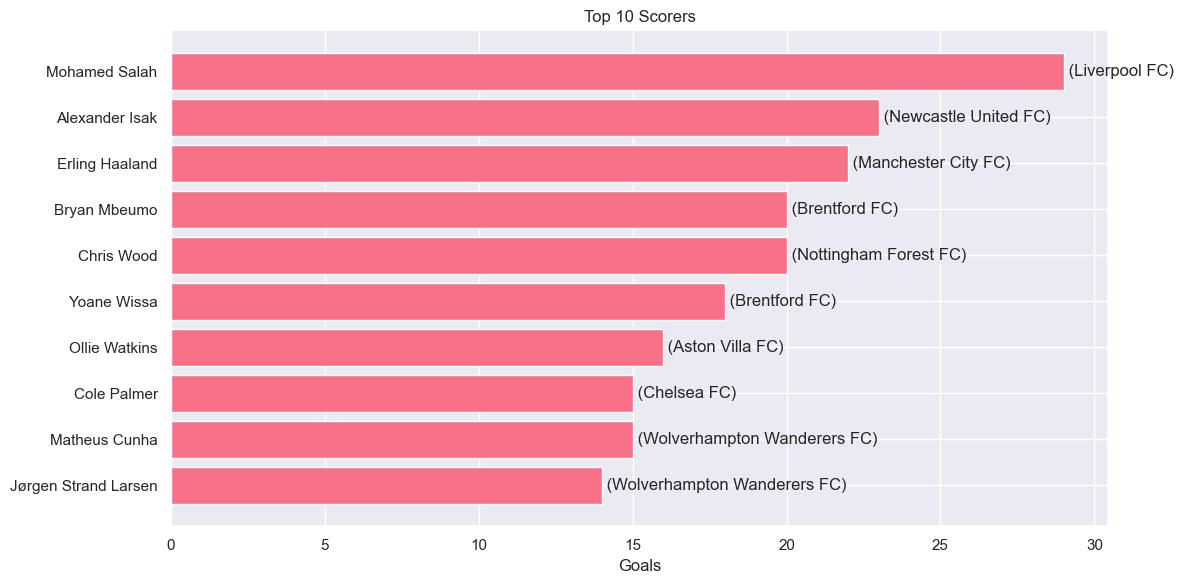

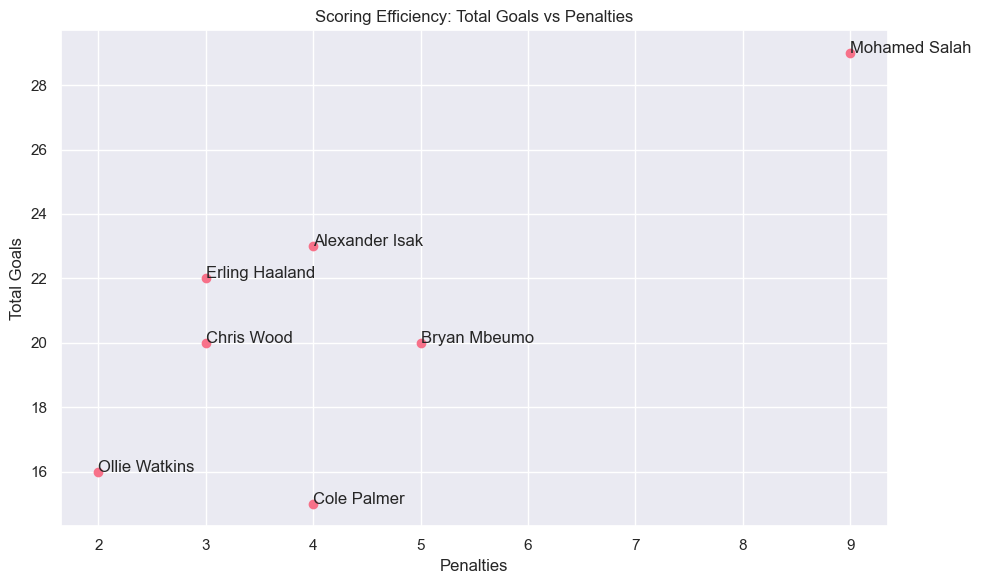


Fetching team data...
An error occurred: 'squad'


In [7]:
# Initialize the player analyzer
player_analyzer = PlayerAnalyzer(api_key)

try:
    # Fetch top scorers data
    print("Fetching scorers data...")
    scorers_data = player_analyzer.fetch_scorers('PL')
    scorers_df = player_analyzer.extract_scorers_data(scorers_data)
    
    if not scorers_df.empty:
        # Create visualizations for scorers
        plot_top_scorers(scorers_df)
        plot_scoring_efficiency(scorers_df)
    else:
        print("No scorers data available")

    # Example team analysis (Manchester City - ID: 65)
    print("\nFetching team data...")
    team_data = player_analyzer.fetch_team_players(65)
    team_df = player_analyzer.extract_players_data(team_data)
    
    if not team_df.empty:
        # Create player visualizations
        plot_position_distribution(team_df)
        plot_nationality_distribution(team_df)
        plot_age_distribution(team_df)

        # Display some player statistics
        if not scorers_df.empty:
            player_stats = pd.DataFrame({
                'Top Scorer': f"{scorers_df.iloc[0]['player']} ({scorers_df.iloc[0]['goals']} goals)" if len(scorers_df) > 0 else "No data",
                'Most Penalties': f"{scorers_df.loc[scorers_df['penalties'].idxmax(), 'player']} ({scorers_df['penalties'].max()} penalties)" if len(scorers_df) > 0 else "No data",
                'Average Goals': f"{scorers_df['goals'].mean():.1f}" if len(scorers_df) > 0 else "No data",
                'Total Goals': scorers_df['goals'].sum() if len(scorers_df) > 0 else "No data"
            }, index=['Value'])
            
            display(player_stats.T)
    else:
        print("No team data available")

except Exception as e:
    print(f"An error occurred: {e}")

## Team Performance Metrics
Additional team performance visualizations

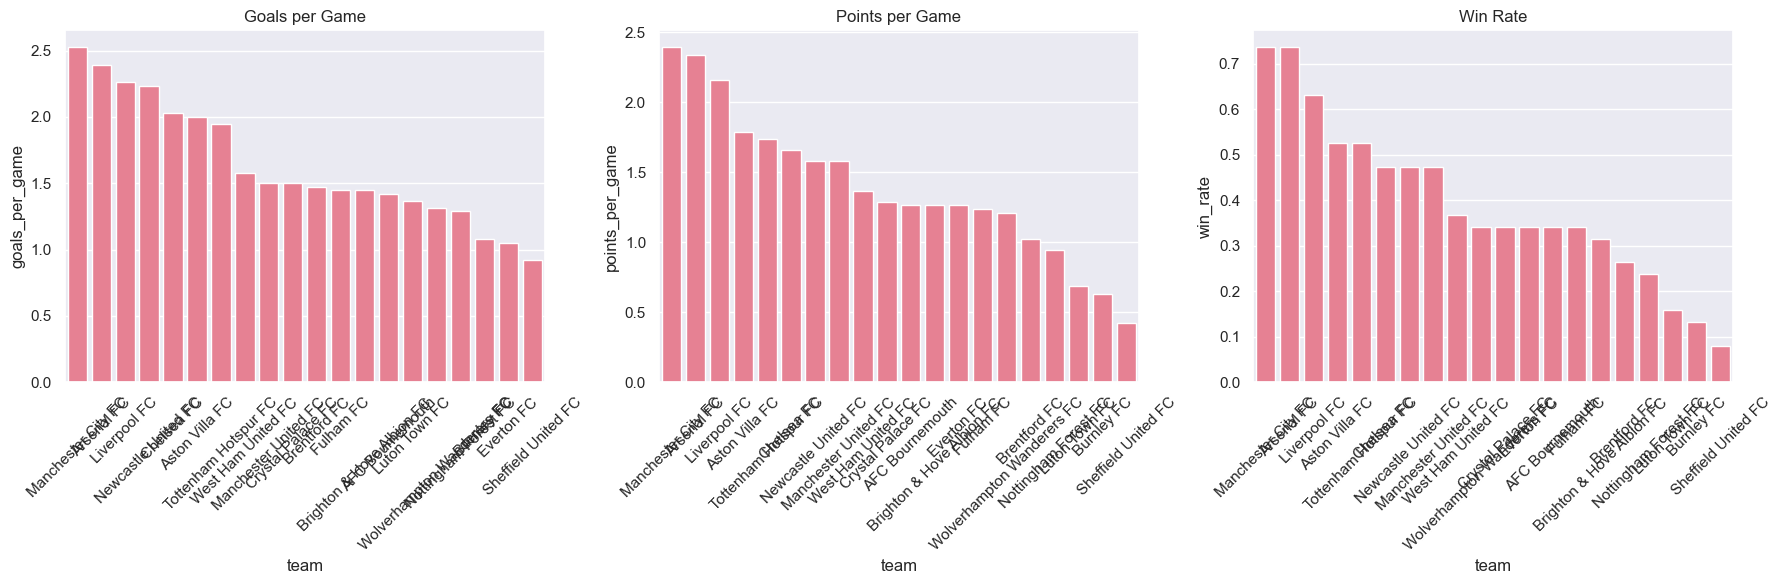

,Value
Most Efficient Attack,Manchester City FC (2.53 goals/game)
Best Points Return,Manchester City FC (2.39 points/game)
Highest Win Rate,Manchester City FC (73.7%)


In [8]:
def plot_team_efficiency(df):
    """Plot team efficiency metrics"""
    # Calculate efficiency metrics
    df['goals_per_game'] = df['goals_for'] / df['played']
    df['points_per_game'] = df['points'] / df['played']
    df['win_rate'] = df['won'] / df['played']
    
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Goals per game
    sns.barplot(data=df.sort_values('goals_per_game', ascending=False),
                x='team', y='goals_per_game', ax=axes[0])
    axes[0].set_title('Goals per Game')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Points per game
    sns.barplot(data=df.sort_values('points_per_game', ascending=False),
                x='team', y='points_per_game', ax=axes[1])
    axes[1].set_title('Points per Game')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Win rate
    sns.barplot(data=df.sort_values('win_rate', ascending=False),
                x='team', y='win_rate', ax=axes[2])
    axes[2].set_title('Win Rate')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Create team efficiency visualizations
plot_team_efficiency(standings_df)

# Calculate and display advanced team statistics
advanced_stats = pd.DataFrame({
    'Most Efficient Attack': f"{standings_df.loc[standings_df['goals_per_game'].idxmax(), 'team']} ({standings_df['goals_per_game'].max():.2f} goals/game)",
    'Best Points Return': f"{standings_df.loc[standings_df['points_per_game'].idxmax(), 'team']} ({standings_df['points_per_game'].max():.2f} points/game)",
    'Highest Win Rate': f"{standings_df.loc[standings_df['win_rate'].idxmax(), 'team']} ({standings_df['win_rate'].max()*100:.1f}%)"
}, index=['Value'])

advanced_stats.T